In [1]:
from egoviz.cdss_utils.stats import get_descriptive_stats
import matplotlib.pyplot as plt

In [2]:
data = get_descriptive_stats()

In [3]:
# Extracting data for plotting
questions = [data[key]['question'] for key in data][::-1]  # Reverse the order of questions
means = [data[key]['mean'] for key in data][::-1]
mins = [data[key]['min'] for key in data][::-1]
maxs = [data[key]['max'] for key in data][::-1]
stds = [data[key]['std'] for key in data][::-1]

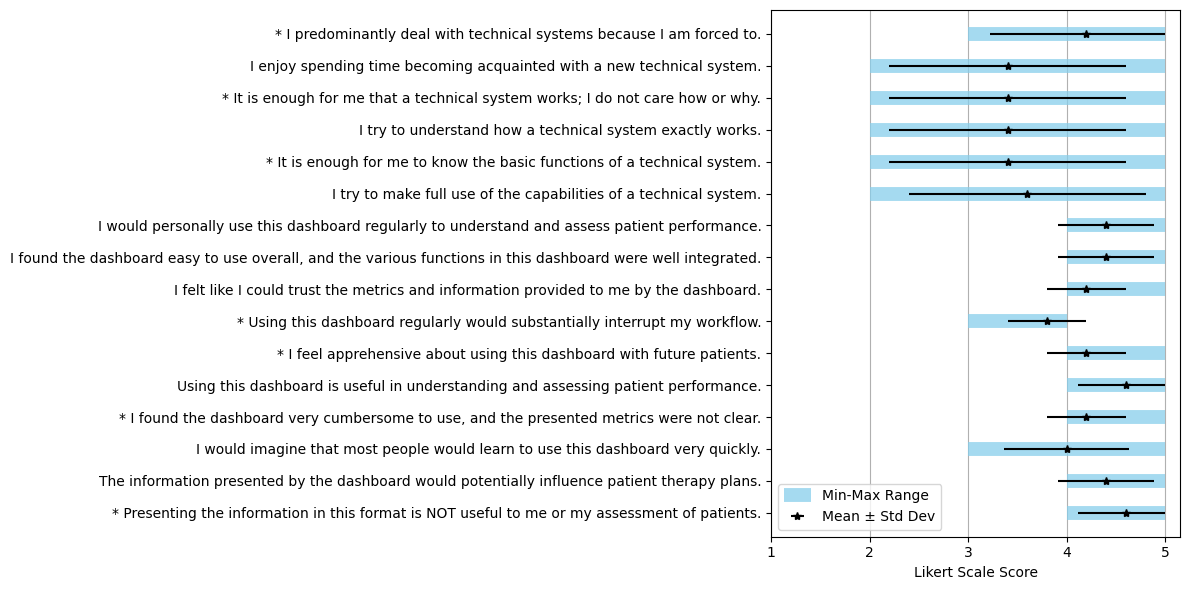

In [4]:
# Plotting the horizontal bars with mean, min, max, and standard deviation
plt.figure(figsize=(12,6))

for i, question in enumerate(questions):
    plt.hlines(y=i, xmin=mins[i], xmax=maxs[i], color='skyblue', alpha=0.75, lw=10, label='Min-Max Range' if i == 0 else "")
    # Cap the error bars at 1 and 5
    lower_error = means[i] - stds[i]
    upper_error = means[i] + stds[i]
    lower_error = max(lower_error, 1)
    upper_error = min(upper_error, 5)
    plt.errorbar(means[i], i, xerr=[[means[i] - lower_error], [upper_error - means[i]]], fmt='*', color='black', label='Mean ± Std Dev' if i == 0 else "")

plt.yticks(range(len(questions)), questions)
plt.xticks(range(1, 6))  # Ensuring the x-axis shows 1-5
plt.xlabel('Likert Scale Score')
# plt.title('Survey Results with Min, Max, Mean, and Standard Deviation')
plt.grid(axis='x')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()


# plot the trace of each person vertically across the questions

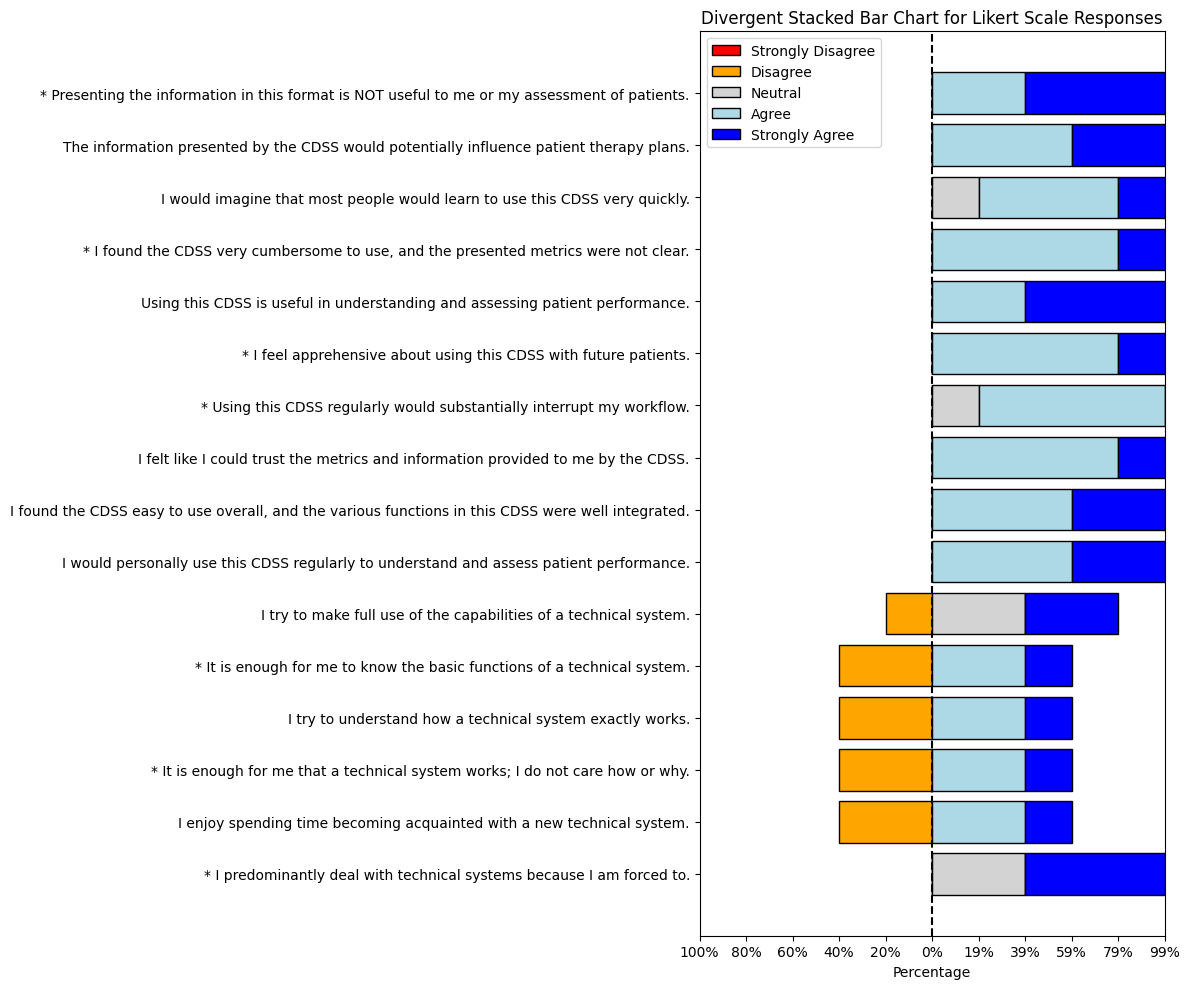

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Dictionary of questions and their corresponding indices
questions = {
    0: "* I predominantly deal with technical systems because I am forced to.",
    1: "I enjoy spending time becoming acquainted with a new technical system.",
    2: "* It is enough for me that a technical system works; I do not care how or why.",
    3: "I try to understand how a technical system exactly works.",
    4: "* It is enough for me to know the basic functions of a technical system.",
    5: "I try to make full use of the capabilities of a technical system.",
    6: "I would personally use this CDSS regularly to understand and assess patient performance.",
    7: "I found the CDSS easy to use overall, and the various functions in this CDSS were well integrated.",
    8: "I felt like I could trust the metrics and information provided to me by the CDSS.",
    9: "* Using this CDSS regularly would substantially interrupt my workflow.",
    10: "* I feel apprehensive about using this CDSS with future patients.",
    11: "Using this CDSS is useful in understanding and assessing patient performance.",
    12: "* I found the CDSS very cumbersome to use, and the presented metrics were not clear.",
    13: "I would imagine that most people would learn to use this CDSS very quickly.",
    14: "The information presented by the CDSS would potentially influence patient therapy plans.",
    15: "* Presenting the information in this format is NOT useful to me or my assessment of patients.",
}

# List of questions to be reverse scored
reverse_scored = [0, 2, 4, 9, 10, 12, 15]

# Scores for each question from each participant
# Columns correspond to questions (above) and rows correspond to participants
scores = np.array(
    [
        [1, 4, 2, 4, 2, 5, 4, 4, 4, 2, 2, 5, 2, 4, 4, 1],  # T-01
        [1, 5, 1, 5, 1, 5, 5, 5, 5, 2, 1, 5, 1, 4, 5, 1],  # T-02
        [3, 2, 4, 2, 4, 3, 4, 4, 4, 3, 2, 4, 2, 4, 4, 2],  # T-03
        [3, 4, 2, 4, 2, 3, 5, 5, 4, 2, 2, 5, 2, 5, 5, 1],  # T-04
        [1, 2, 4, 2, 4, 2, 4, 4, 4, 2, 2, 4, 2, 3, 4, 2],  # T-05
    ]
)

# Reverse score questions
for question in reverse_scored:
    scores[:, question] = 6 - scores[:, question]

# Creating a DataFrame from the scores
df = pd.DataFrame(scores, columns=[questions[i] for i in range(scores.shape[1])])

# Calculate the proportion of responses for each category
proportions = df.apply(lambda x: x.value_counts(normalize=True).sort_index(), axis=0).fillna(0)

# Ensure all Likert scale points are represented
for i in range(1, 6):
    if i not in proportions.index:
        proportions.loc[i] = 0

proportions = proportions.sort_index()

# Splitting the proportions for divergent bar chart
strongly_disagree = -proportions.loc[1]
disagree = -proportions.loc[2]
neutral = proportions.loc[3]
agree = proportions.loc[4]
strongly_agree = proportions.loc[5]

# Plotting the divergent stacked bar chart
fig, ax = plt.subplots(figsize=(12, 10))

ax.barh(y=proportions.columns, width=strongly_disagree, color='red', edgecolor='black', label='Strongly Disagree')
ax.barh(y=proportions.columns, width=disagree, left=strongly_disagree, color='orange', edgecolor='black', label='Disagree')
ax.barh(y=proportions.columns, width=neutral, color='lightgrey', edgecolor='black', label='Neutral')
ax.barh(y=proportions.columns, width=agree, left=neutral, color='lightblue', edgecolor='black', label='Agree')
ax.barh(y=proportions.columns, width=strongly_agree, left=neutral+agree, color='blue', edgecolor='black', label='Strongly Agree')

ax.set_yticks(proportions.columns)
ax.set_yticklabels(proportions.columns)
 
ax.set_xticks(np.arange(-1, 1.1, 0.2))
ax.set_xticklabels([f"{int(abs(i*100))}%" for i in np.arange(-1, 1.1, 0.2)])
ax.axvline(0, color='black', linestyle='--')
ax.set_xlabel('Percentage')
ax.set_title('Divergent Stacked Bar Chart for Likert Scale Responses')
ax.legend()

plt.tight_layout()
plt.show()
